<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Unsupervised%20Learning/Singular%20Value%20Decomposition/Singular_Value_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist


Original Image Shape: (28, 28)


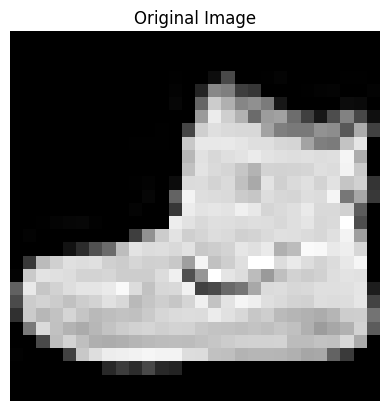

In [12]:
def load_fashion_mnist_image():
    """
    Loads the Fashion MNIST dataset and returns the first image for demonstration.

    Returns:
        image (ndarray): A single grayscale image (28x28) from the dataset.
    """
    (X_train, _), (_, _) = fashion_mnist.load_data()
    image = X_train[0]  # Select the first image
    return image

# Load the image
image = load_fashion_mnist_image()
print("Original Image Shape:", image.shape)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


In [13]:
def apply_svd(image):
    """
    Applies Singular Value Decomposition (SVD) to a given image matrix.

    Args:
        image (ndarray): The grayscale image matrix.

    Returns:
        U (ndarray): Left singular vectors.
        Sigma (ndarray): Singular values (1D array).
        Vt (ndarray): Right singular vectors.
    """
    U, Sigma, Vt = np.linalg.svd(image, full_matrices=False)
    return U, Sigma, Vt

# Apply SVD
U, Sigma, Vt = apply_svd(image)
print("SVD Decomposition Completed.")
print(f"Shapes - U: {U.shape}, Sigma: {Sigma.shape}, Vt: {Vt.shape}")


SVD Decomposition Completed.
Shapes - U: (28, 28), Sigma: (28,), Vt: (28, 28)


In [14]:
def reconstruct_image(U, Sigma, Vt, k):
    """
    Reconstructs an image using the top-k singular values.

    Args:
        U (ndarray): Left singular vectors.
        Sigma (ndarray): Singular values (1D array).
        Vt (ndarray): Right singular vectors.
        k (int): Number of singular values to retain.

    Returns:
        reconstructed (ndarray): Reconstructed image matrix.
    """
    Sigma_k = np.diag(Sigma[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    reconstructed = np.dot(U_k, np.dot(Sigma_k, Vt_k))
    return reconstructed

# Choose k values and reconstruct images
k_values = [10, 20, 50]
reconstructed_images = [reconstruct_image(U, Sigma, Vt, k) for k in k_values]


In [15]:
def reconstruction_error(original, reconstructed):
    """
    Computes the reconstruction error (Frobenius norm) between the original and reconstructed image.

    Args:
        original (ndarray): The original image matrix.
        reconstructed (ndarray): The reconstructed image matrix.

    Returns:
        error (float): Reconstruction error.
    """
    return np.linalg.norm(original - reconstructed)

# Calculate reconstruction errors for each k
errors = [reconstruction_error(image, reconstructed) for reconstructed in reconstructed_images]
for k, error in zip(k_values, errors):
    print(f"Reconstruction Error for k={k}: {error:.2f}")


Reconstruction Error for k=10: 245.48
Reconstruction Error for k=20: 26.60
Reconstruction Error for k=50: 0.00


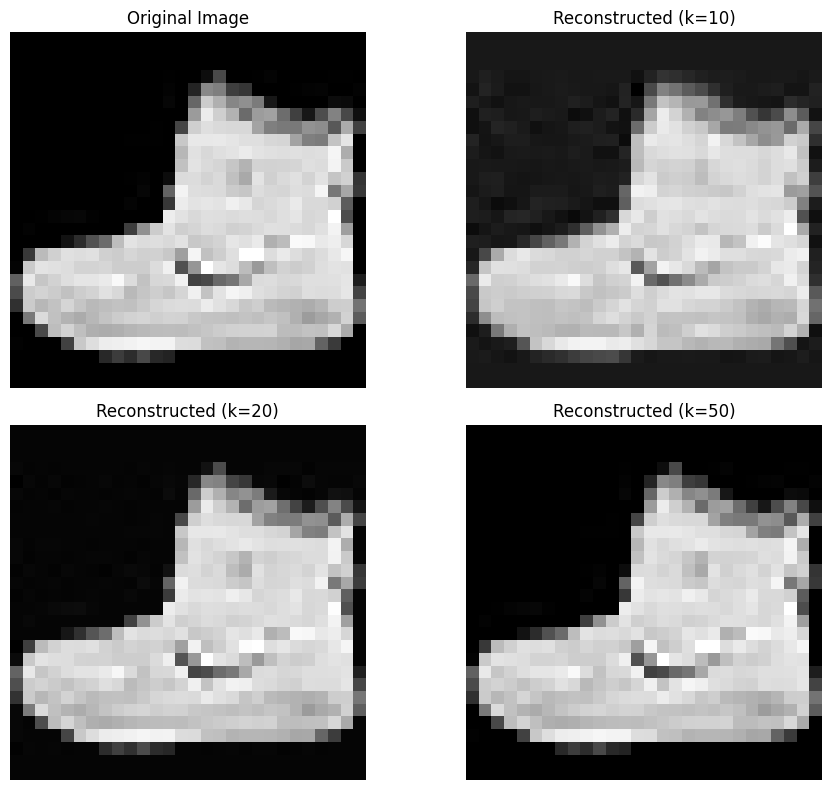

In [16]:
def plot_reconstruction(original, reconstructed_images, k_values):
    """
    Visualizes the original image and its reconstructions for various k values.

    Args:
        original (ndarray): The original image matrix.
        reconstructed_images (list): List of reconstructed images.
        k_values (list): List of k values used for reconstruction.
    """
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    for i, (reconstructed, k) in enumerate(zip(reconstructed_images, k_values), start=2):
        plt.subplot(2, 2, i)
        plt.imshow(reconstructed, cmap='gray')
        plt.title(f"Reconstructed (k={k})")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the original and reconstructed images
plot_reconstruction(image, reconstructed_images, k_values)


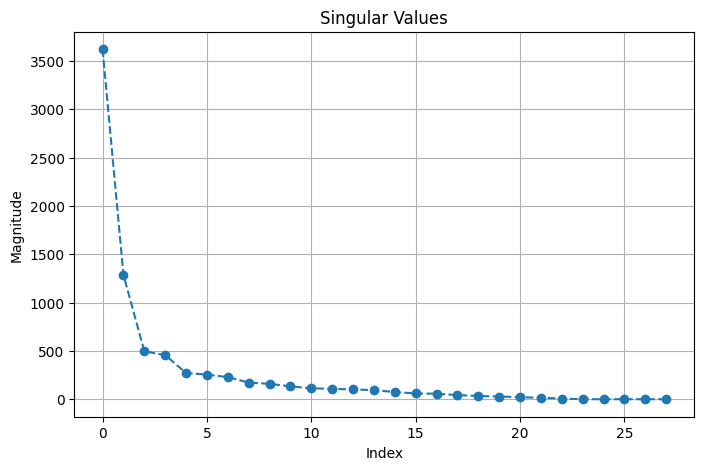

In [17]:
def plot_singular_values(Sigma):
    """
    Plots the singular values to visualize their contribution.

    Args:
        Sigma (ndarray): Singular values (1D array).
    """
    plt.figure(figsize=(8, 5))
    plt.plot(Sigma, marker='o', linestyle='--')
    plt.title("Singular Values")
    plt.xlabel("Index")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

# Plot the singular values
plot_singular_values(Sigma)


In [18]:

# Function to apply SVD on an image
def apply_svd(image):
    U, Sigma, Vt = np.linalg.svd(image, full_matrices=False)
    return U, Sigma, Vt

# Function to reconstruct an image using top-k singular values
def reconstruct_image(U, Sigma, Vt, k):
    Sigma_k = np.diag(Sigma[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    return np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Function to compute reconstruction error
def reconstruction_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed)

# Function for batch processing
def batch_processing(X, k_values):
    errors_per_k = []
    for k in k_values:
        total_error = 0
        for i in range(len(X)):
            U, Sigma, Vt = apply_svd(X[i])
            reconstructed = reconstruct_image(U, Sigma, Vt, k)
            total_error += reconstruction_error(X[i], reconstructed)
        avg_error = total_error / len(X)
        errors_per_k.append(avg_error)
    return errors_per_k

# Process the first 100 images and calculate errors
k_values = [10, 20, 50]
batch_errors = batch_processing(X_train[:100], k_values)

# Print results
for k, error in zip(k_values, batch_errors):
    print(f"Average Reconstruction Error for k={k}: {error:.2f}")


Average Reconstruction Error for k=10: 119.38
Average Reconstruction Error for k=20: 5.07
Average Reconstruction Error for k=50: 0.00


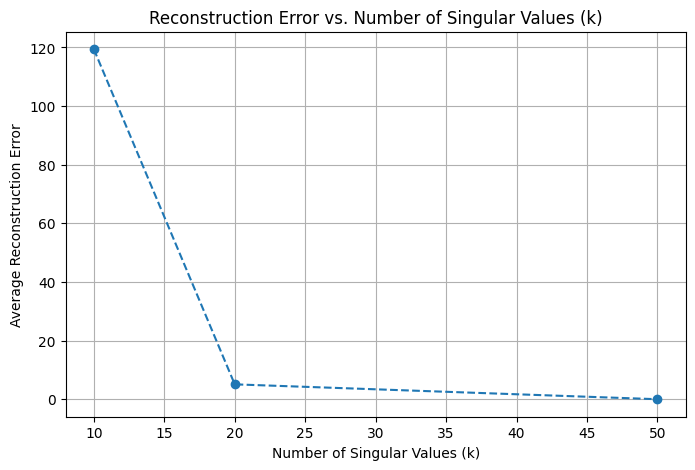

In [19]:
import matplotlib.pyplot as plt

# Plot reconstruction errors
plt.figure(figsize=(8, 5))
plt.plot(k_values, batch_errors, marker='o', linestyle='--')
plt.title("Reconstruction Error vs. Number of Singular Values (k)")
plt.xlabel("Number of Singular Values (k)")
plt.ylabel("Average Reconstruction Error")
plt.grid()
plt.show()
